<a href="https://colab.research.google.com/github/Eternity402/Cylab-Diary/blob/master/Cylab_Diary%2007-Study_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
# Base Library Import
# 만약 tf를 그냥 import tensorflow하면 가장 아래에 있는 test cell에서 에러가 뜸

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras import Model
# For easier usation

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 48.4MB/s 
     |████████████████████████████████| 4.3MB 38.7MB/s 


In [0]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# Dataset - CIFAR100

169009152/169001437 [==============================] - 2s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

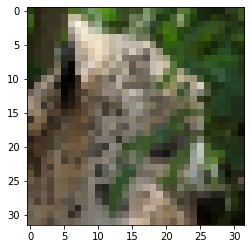

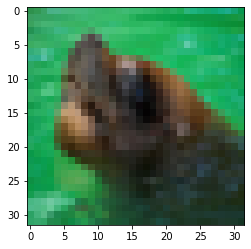

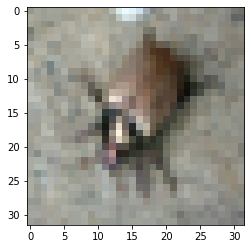

In [0]:
# Check images
sample = np.random.randint(x_train.shape[0],size = 3)
for i in range(3):
  plt.imshow(x_train[sample[i],:,:,:])
  plt.show()

In [0]:
# Shuffle and make batch
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(50000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
# Additional Check
# tf.data.Dataset is for easier tensorization of various types of data
# Also for easier transformation of tensors.
# + Batch / Shuffle etc...

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(4, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
    self.flatten = Flatten()
    self.d1 = Dense(4, activation='relu')
    self.d2 = Dense(100, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [0]:
# CNN Architecture
# model.build(input_shape = (None,32,32,3))
# 위의 model.build는 모델을 돌려보지 않고 체크할 때 사용.
# 모델을 한번이라도 돌려보면 바로 summary 해도 가능!
model.summary()

ValueError: ignored

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    print(predictions)
    loss = loss_object(labels, predictions)
    print(loss)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
EPOCHS = 50
Testnum = 8
hist = np.empty(shape=(Testnum,2,EPOCHS))
for mod in range(Testnum):
  if mod < 3 or mod > 3:
    pass
  else:
    class MyModel(Model):
      def __init__(self):
        super(MyModel, self).__init__()
        if mod == 0:
          self.conv1 = Conv2D(32, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(128, activation='relu')
          self.d2 = Dense(100, activation='softmax')
        elif mod == 1:
          self.conv1 = Conv2D(16, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(256, activation='relu')
          self.d2 = Dense(100, activation='softmax')
        elif mod == 2:
          self.conv1 = Conv2D(32, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(256, activation='relu')
          self.d2 = Dense(100, activation='softmax')
        elif mod == 3:
          self.conv1 = Conv2D(64, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.conv2 = Conv2D(64, (3,3),padding = 'same', activation = 'relu')
          self.bn1 = BatchNormalization()
          self.avg1 = AveragePooling2D()
          self.flatten = Flatten()
          self.d1 = Dense(256, activation='relu')
          self.d2 = Dense(100, activation='softmax')
        elif mod == 4:
          self.conv1 = Conv2D(16, (3,3), padding = 'valid', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(256, activation='relu')
          self.d2 = Dropout(0.5)
          self.d3 = Dense(100, activation='softmax')
        elif mod == 5:
          self.conv1 = Conv2D(32, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(512, activation='relu')
          self.d2 = Dense(100, activation='softmax')
        elif mod == 6:
          self.conv1 = Conv2D(32, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(512, activation='relu')
          self.d2 = Dropout(0.5)
          self.d3 = Dense(100, activation='softmax')
        elif mod == 7:
          self.conv1 = Conv2D(32, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.conv2 = Conv2D(32, (3,3), padding = 'same', activation='relu',input_shape=x_train.shape[1:])
          self.flatten = Flatten()
          self.d1 = Dense(256, activation='relu')
          self.d2 = Dense(100, activation='softmax')
        

      def call(self, x):
        if mod < 3 or mod == 5:
          x = self.conv1(x)
          x = self.flatten(x)
          x = self.d1(x)
          return self.d2(x)
        elif mod < 5 or mod == 6:
          x1 = self.conv1(x)
          x2 = self.conv2(x1)
          x3 = self.conv2(x2)
          x4 = self.conv2(x3)
          x = x4+x1
          x = self.bn1(x)
          x1 = self.conv2(x)
          x2 = self.conv2(x1)
          x3 = self.conv2(x2)
          x = x3+x
          x = self.bn1(x)
          x1 = self.conv2(x)
          x2 = self.conv2(x1)
          x3 = self.conv2(x2)
          x = x3+x
          x = self.bn1(x)
          x1 = self.conv2(x)
          x2 = self.conv2(x1)
          x3 = self.conv2(x2)
          x = x3+x
          x = self.bn1(x)
          x = self.avg1(x)
          x = self.flatten(x)
          x = self.d1(x)
          return self.d2(x)
        else:
          x = self.conv1(x)
          x = self.conv2(x)
          x = self.flatten(x)
          x = self.d1(x)
          return self.d2(x)
  if mod < 3 or mod > 3:
    pass
  else:
    model = MyModel()

    loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

    optimizer = tf.keras.optimizers.Adam()

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

    @tf.function
    def train_step(images, labels):
      with tf.GradientTape() as tape:
        predictions = model(images)
        print(predictions)
        loss = loss_object(labels, predictions)
        print(loss)
      gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
      train_loss(loss)
      train_accuracy(labels, predictions)

    @tf.function
    def test_step(images, labels):
      predictions = model(images)
      t_loss = loss_object(labels, predictions)

      test_loss(t_loss)
      test_accuracy(labels, predictions)

    for epoch in range(EPOCHS):
      for images, labels in train_ds:
        train_step(images, labels)

      for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

      template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
      hist[mod,:,epoch] = (train_accuracy.result(),test_accuracy.result())
      print (template.format(epoch+1,
                            train_loss.result(),
                            train_accuracy.result()*100,
                            test_loss.result(),
                            test_accuracy.result()*100))
    plt.plot(range(EPOCHS),hist[mod,0])
    plt.plot(range(EPOCHS),hist[mod,1])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title(mod)
    plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Tensor("my_model/dense_1/Softmax:0", shape=(32, 100), dtype=float32)
Tensor("sparse_categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("my_model/dense_1/Softmax:0", shape=(32, 100), dtype=float32)
Tensor("sparse_categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("my_model/dense_1/Softmax:0", shape=(16, 100), dtype=float32)
Tensor("sparse_categorical_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
에포크: 1, 손실: 3.4478909969329834, 정확